## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata = mouse_metadata.merge(study_results,on="Mouse ID")
mouse_metadata_df = pd.DataFrame(mouse_metadata)

# Display the data table for preview
mouse_metadata_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mouse_count1 = mouse_metadata_df["Mouse ID"].value_counts().count()
print(mouse_count1)

249


In [4]:
mouse_count1b = mouse_metadata_df["Mouse ID"].count()
print(mouse_count1b)

1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_metadata_df['Timepoint'] = mouse_metadata_df['Timepoint'].astype(str)
mouse_metadata_dup_df = mouse_metadata_df[mouse_metadata_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
mouse_metadata_dup_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
print(mouse_metadata[mouse_metadata["Mouse ID"]=='g989'])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g) Timepoint  \
908     g989     Propriva  Female          21          26         0   
909     g989     Propriva  Female          21          26         0   
910     g989     Propriva  Female          21          26         5   
911     g989     Propriva  Female          21          26         5   
912     g989     Propriva  Female          21          26        10   
913     g989     Propriva  Female          21          26        10   
914     g989     Propriva  Female          21          26        15   
915     g989     Propriva  Female          21          26        15   
916     g989     Propriva  Female          21          26        20   
917     g989     Propriva  Female          21          26        20   
918     g989     Propriva  Female          21          26        25   
919     g989     Propriva  Female          21          26        30   
920     g989     Propriva  Female          21          26        35   

     

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_metadata_df = mouse_metadata_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
mouse_metadata_df.drop(mouse_metadata_df[mouse_metadata_df['Mouse ID']=='g989'].index, inplace=True)
#mouse_metadata_df.dtypes

# Restore Timepoint to Int. 
mouse_metadata_df['Timepoint'] = mouse_metadata_df['Timepoint'].astype(int)
#mouse_metadata_df.count()

In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = mouse_metadata_df["Mouse ID"].value_counts().count()
print(mouse_count2)

248


In [9]:
mouse_count2b = mouse_metadata_df["Mouse ID"].count()
print(mouse_count2b)

1880


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mouse_metadata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe(include='all')
mouse_metadata_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total of Unique Mice tested per Drug Regimen'}, xlabel='Drug Regimens', ylabel='Number of Mice'>

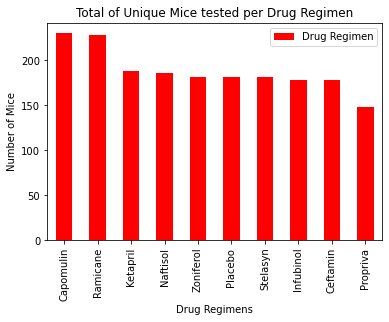

In [12]:
unique_mice_tested_df = pd.DataFrame(mouse_metadata_df["Drug Regimen"].value_counts())
unique_mice_tested_df.plot.bar(x=None,
                               y=None,
                               color="red",
                               title="Total of Unique Mice tested per Drug Regimen",
                               xlabel="Drug Regimens",
                               ylabel="Number of Mice")  

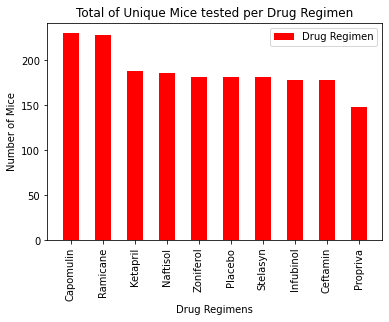

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
unique_mice_tested_df = pd.DataFrame(mouse_metadata_df["Drug Regimen"].value_counts())

unique_mice_tested_cnt = mouse_metadata_df["Drug Regimen"].value_counts()
x_axis = unique_mice_tested_cnt.index
plt.bar(x_axis, unique_mice_tested_cnt, width=0.5, color='r', alpha=1, align="center")
plt.xticks(x_axis, rotation='vertical')
plt.title('Total of Unique Mice tested per Drug Regimen')
plt.xlabel('Drug Regimens')
plt.ylabel('Number of Mice')
plt.legend(['Drug Regimen'])

<AxesSubplot:title={'center':'Gender of Mice in the Drug Regimen Study'}, ylabel='Sex'>

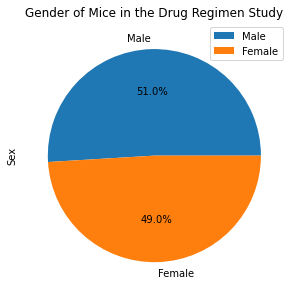

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = pd.DataFrame(mouse_metadata_df["Sex"].value_counts())
#mice_gender_df

mice_gender_df.plot.pie(y='Sex', figsize=(4.9, 4.9), autopct='%1.1f%%', title='Gender of Mice in the Drug Regimen Study')

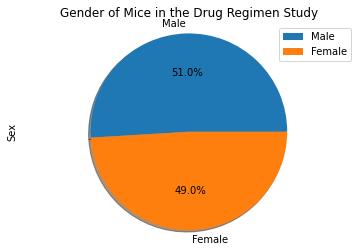

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#mice_gender_df = pd.DataFrame(mouse_metadata_df["Sex"].value_counts())
#mice_gender_df
mice_gender_cnt = mouse_metadata_df["Sex"].value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = mice_gender_cnt.index
explode = (0, 0, 0)  # only "explode" the .... 

plt.pie(mice_gender_cnt, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('Sex')
plt.legend()
plt.title('Gender of Mice in the Drug Regimen Study')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_metadata_tvol = mouse_metadata_df[mouse_metadata_df['Timepoint'] == mouse_metadata_df.groupby('Mouse ID')['Timepoint'].transform('max')]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_metadata_tvol_df = pd.DataFrame(mouse_metadata_tvol)
mouse_metadata_tvol_df["TVol"] = "Y"

indexNames = mouse_metadata_tvol_df[(mouse_metadata_tvol_df['Drug Regimen'] != 'Capomulin') & 
                                    (mouse_metadata_tvol_df['Drug Regimen'] != 'Ramicane') & 
                                    (mouse_metadata_tvol_df['Drug Regimen'] != 'Infubinol') & 
                                    (mouse_metadata_tvol_df['Drug Regimen'] != 'Ceftamin' )].index
mouse_metadata_tvol_df.count()
mouse_metadata_tvol_df.drop(indexNames, inplace=True)
#mouse_metadata_tvol_df.count()
mouse_metadata_tvol_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,TVol
9,k403,Ramicane,Male,21,16,45,22.050126,1,Y
19,s185,Capomulin,Female,3,17,45,23.343598,1,Y
29,x401,Capomulin,Female,16,15,45,28.484033,0,Y
39,m601,Capomulin,Male,22,17,45,28.430964,1,Y
49,g791,Ramicane,Male,11,16,45,29.128472,1,Y
...,...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3,Y
1813,y163,Infubinol,Female,17,27,45,67.685569,3,Y
1845,y769,Ceftamin,Female,6,27,45,68.594745,4,Y
1855,y865,Ceftamin,Male,23,26,45,64.729837,3,Y


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

9       22.050126
19      23.343598
39      28.430964
29      28.484033
49      29.128472
          ...    
1112    67.748662
463     67.973419
1845    68.594745
1033    68.923185
637     72.226731
Name: Tumor Volume (mm3), Length: 100, dtype: float64


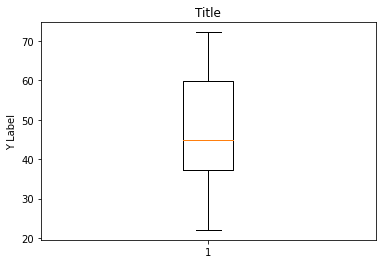

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

mouse_metadata_tvol = mouse_metadata_tvol_df["Tumor Volume (mm3)"]
mouse_metadata_tvol = mouse_metadata_tvol.sort_values()
print(mouse_metadata_tvol)

quartile = mouse_metadata_tvol.quantile([.4,.5,.6])
lowerq = quartile[0.4]
upperq = quartile[0.6]
iqr = upperq-lowerq

lower_bound = lowerq - (1.2*iqr)
upper_bound = upperq + (1.2*iqr)

fig1, ax1 = plt.subplots()
#colors = ['#73020C', '#426A8C', '#D94D1A']
#colors_for_one = dict(color=colors[0])
#colors_for_all = dict(color=colors[1])
green_diamond = dict(markerfacecolor='g', marker='D')
#fig3, ax3 = plt.subplots()
#ax3.set_title('Changed Outlier Symbols')
#ax3.boxplot(data, flierprops=green_diamond
ax1.set_title('Title')
ax1.set_ylabel('Y Label')
##ax1.boxplot(mouse_metadata_tvol,sym='k.',showfliers=True,flierprops=green_diamond)
##plt.show()

bp = ax1.boxplot(mouse_metadata_tvol, showfliers=True)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.show()

## Line and Scatter Plots

In [42]:
quartile = mouse_metadata_tvol.quantile([.25,.5,.75])
lowerq = quartile[0.25]
upperq = quartile[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Mouse tumor volumes is: {lowerq}" )
print(f"The upper quartile of Mouse tumor volumes is: {upperq}" )
print(f"The interquartile range of Mouse tumor volumes is: {iqr}")
print(f"The median of the Mouse tumor volumes is: {quartile[0.5]}" )

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 

The lower quartile of Mouse tumor volumes is: 37.187743802499995
The upper quartile of Mouse tumor volumes is: 59.930261755000004
The interquartile range of Mouse tumor volumes is: 22.74251795250001
The median of the Mouse tumor volumes is: 45.0
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
